**1. Importing Needed Libraries**

In [19]:
#data analysis libraries
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns


#ignore warnings
import warnings
warnings.filterwarnings('ignore')




**2. Reading and Exploring Data**

In [20]:
data = pd.read_excel(r"/content/titanic3.xls")
data.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [21]:
#take a look at the training data
print(data.describe(include="all"))


             pclass     survived              name   sex          age  \
count   1309.000000  1309.000000              1309  1309  1046.000000   
unique          NaN          NaN              1307     2          NaN   
top             NaN          NaN  Kelly, Mr. James  male          NaN   
freq            NaN          NaN                 2   843          NaN   
mean       2.294882     0.381971               NaN   NaN    29.881135   
std        0.837836     0.486055               NaN   NaN    14.413500   
min        1.000000     0.000000               NaN   NaN     0.166700   
25%        2.000000     0.000000               NaN   NaN    21.000000   
50%        3.000000     0.000000               NaN   NaN    28.000000   
75%        3.000000     1.000000               NaN   NaN    39.000000   
max        3.000000     1.000000               NaN   NaN    80.000000   

              sibsp        parch    ticket         fare        cabin embarked  \
count   1309.000000  1309.000000      1309

**3. Data Analysis**

**Now seeing sample of data. To see the sample values in all columns**

In [22]:
data.sample(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1005,3,0,"McEvoy, Mr. Michael",male,NaN,0,0,36568,15.5000,NaN,Q,NaN,NaN,NaN
607,3,1,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,C,NaN,"Greensburg, PA"
649,3,0,"Assam, Mr. Ali",male,23.0,0,0,SOTON/O.Q. 3101309,7.0500,NaN,S,NaN,NaN,NaN
278,1,1,"Stahelin-Maeglin, Dr. Max",male,32.0,0,0,13214,30.5000,B50,C,3,NaN,"Basel, Switzerland"
659,3,1,"Baclini, Miss. Marie Catherine",female,5.0,2,1,2666,19.2583,NaN,C,C,NaN,"Syria New York, NY"


**Checking which columns are Numerical, Categorical, Alphanumerical.**

In [23]:
numerical = data.select_dtypes(include=['int64', 'float64']).columns
print("numerical: ", numerical)

categorical = data.select_dtypes(include=['object', 'category']).columns
print("categorical: ", categorical)



numerical:  Index(['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 'body'], dtype='object')
categorical:  Index(['name', 'sex', 'ticket', 'cabin', 'embarked', 'boat', 'home.dest'], dtype='object')


In [24]:
# Check for alphanumeric patterns (custom logic)
alphanumeric = []
for col in data.columns:
    if data[col].dtype == 'object' and data[col].str.contains(r'[A-Za-z]\d|\d[A-Za-z]', regex=True).any():
        alphanumeric.append(col)
print(alphanumeric)  # Likely: ['Ticket', 'Cabin', 'boat']

['ticket', 'cabin']


Hence:
Numerical: ['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 'body']

Categorical: ['name', 'sex', 'ticket', 'cabin', 'embarked', 'boat', 'home.dest']

Alphanumerical: ['ticket', 'cabin']

**Datatype of each column**

In [25]:
print(data.dtypes)

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object


**Summary of data**

In [26]:
data.describe(include="all")

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
count,1309.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307,486,121.000000,745
unique,NaN,NaN,1307,2,NaN,NaN,NaN,939,NaN,186,3,28,NaN,369
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S,13,NaN,"New York, NY"
freq,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914,39,NaN,64
mean,2.294882,0.381971,NaN,NaN,29.881135,0.498854,0.385027,NaN,33.295479,NaN,NaN,NaN,160.809917,NaN
std,0.837836,0.486055,NaN,NaN,14.413500,1.041658,0.865560,NaN,51.758668,NaN,NaN,NaN,97.696922,NaN
min,1.000000,0.000000,NaN,NaN,0.166700,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,1.000000,NaN
25%,2.000000,0.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,72.000000,NaN
50%,3.000000,0.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,155.000000,NaN
75%,3.000000,1.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN,NaN,256.000000,NaN


Observations:
Total passengers: 1309

Cabin is missing ((1309-295)/1309)*100= 77.46% of its values.

boat is missing: 62.8% of its values.

body is missing: 90.7% of its values.

home.dest is missing 40.08% of its values.

age is missing 20.09%


Hence, except age, these missing percentages are more than enough to be entertained. So, we simply just drop these columns. And try to fill age column.

Dropping the columns: Cabin, boat, body, home.dest

In [27]:
modified_Data = data.drop(['cabin', 'boat', 'body', 'home.dest'], axis=1)


In [28]:
modified_Data.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'embarked'],
      dtype='object')

Now Checking columns with missing values

In [29]:
missing_values = modified_Data.isnull().sum()
print(missing_values)

pclass        0
survived      0
name          0
sex           0
age         263
sibsp         0
parch         0
ticket        0
fare          1
embarked      2
dtype: int64


**Some own Pre-predictions**

**pclass**: People of Hihger class (1st class, 2nd class) more likely
to survive.

**Sex**: Females are more likely to survive.

**age**: young, children are more likely to survive.

**sibsp**: people with no sibling or less number of sibling more likely to survive.

parch: people traveling alone more likely to survive

I think the features: name ticket, fare, embarked keep no or less significance.


**4. Data Visualization**

Now should be data visualization to show if our predictions were correct.

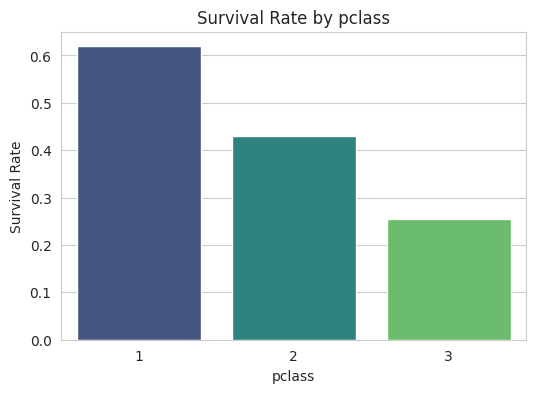

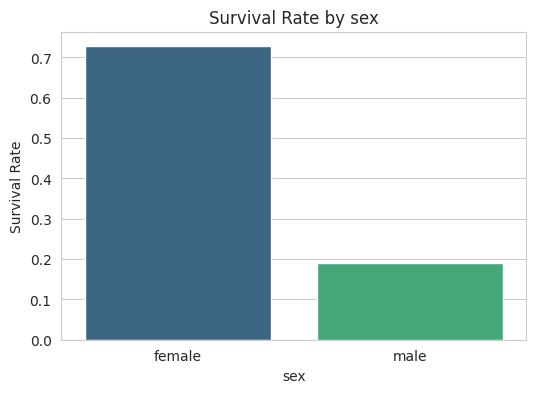

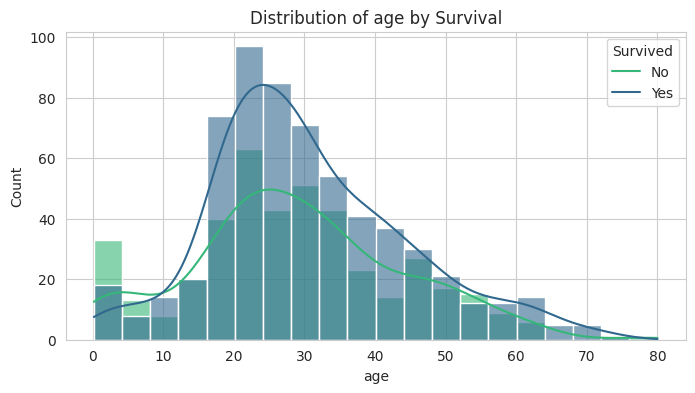

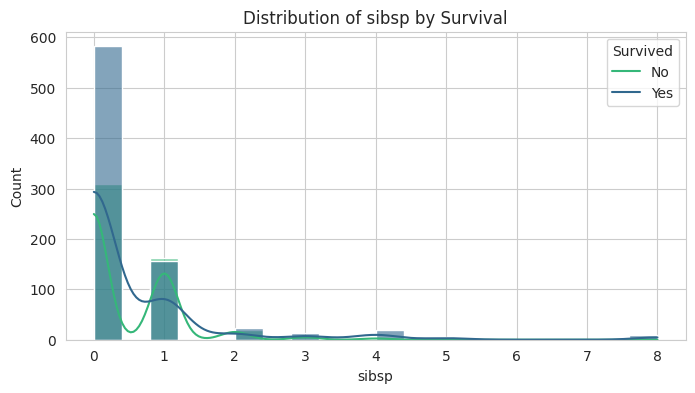

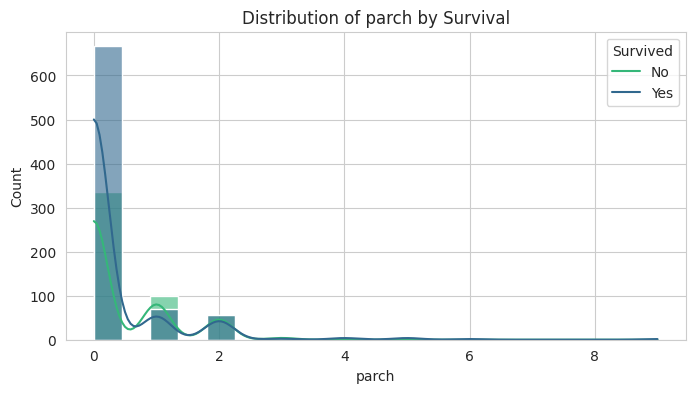

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set_style("whitegrid")

# Categorical features (bar plots)
for col in ['pclass', 'sex']:
    plt.figure(figsize=(6, 4))
    sns.barplot(x=col, y='survived', data=modified_Data, ci=None, palette='viridis')
    plt.title(f'Survival Rate by {col}')
    plt.ylabel('Survival Rate')
    plt.show()


# Numerical features (histograms/KDE)
for col in ['age', 'sibsp', 'parch']:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=modified_Data, x=col, hue='survived', kde=True, bins=20, palette='viridis', alpha=0.6)
    plt.title(f'Distribution of {col} by Survival')
    plt.legend(title='Survived', labels=['No', 'Yes'])
    plt.show()



**5. Cleaning Data**

In [31]:
missing_values = modified_Data.isnull().sum()
print(missing_values)

pclass        0
survived      0
name          0
sex           0
age         263
sibsp         0
parch         0
ticket        0
fare          1
embarked      2
dtype: int64


#fill the 'fare' column with 'mode' value

In [32]:
# Calculate the mode (most frequent value)
fare_mode = modified_Data['fare'].mode()[0]  # mode() returns a Series, so we take the first value

# Fill missing values with mode
modified_Data['fare'].fillna(fare_mode, inplace=True)

Fill embarked feature

In [33]:
# Number of people embarking in Southampton (S)
southampton = modified_Data[modified_Data["embarked"] == "S"].shape[0]
print("Number of people embarking in Southampton (S):", southampton)

# Number of people embarking in Cherbourg (C)
cherbourg = modified_Data[modified_Data["embarked"] == "C"].shape[0]
print("Number of people embarking in Cherbourg (C):", cherbourg)

# Number of people embarking in Queenstown (Q)
queenstown = modified_Data[modified_Data["embarked"] == "Q"].shape[0]
print("Number of people embarking in Queenstown (Q):", queenstown)

Number of people embarking in Southampton (S): 914
Number of people embarking in Cherbourg (C): 270
Number of people embarking in Queenstown (Q): 123


we can see that the majority people embarked in Southampton S.

So, let's fill the 2 missing values with this 'S' value.

In [34]:
#replacing the missing values in the embarked feature with S
modified_Data = modified_Data.fillna({"embarked": "S"})

As, 263 values are missing in age column, so it would not be optimal approach to just replace place most frequent values in these places of missing values.

So, let's make predictions for replacing the empty places with values.

**Let's make grouop-based imputation/ replacement instead of missing values in age column**
A better approach is to fill missing ages based on similar passengers (e.g., by title, class, or sex):

In [35]:
# Extract titles from names (Mr, Mrs, Miss, etc.)
modified_Data['title'] = modified_Data['name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Calculate median age by title
title_median_ages = modified_Data.groupby('title')['age'].median()

# Fill missing ages based on title
modified_Data['age'] = modified_Data.apply(
    lambda row: title_median_ages[row['title']] if pd.isnull(row['age']) else row['age'],
    axis=1
)

In [36]:
# Check statistics of the 'age' column
print(modified_Data['age'].describe())

count    1309.000000
mean       29.432518
std        13.163773
min         0.166700
25%        22.000000
50%        29.000000
75%        35.500000
max        80.000000
Name: age, dtype: float64


In [37]:
missing_values = modified_Data.isnull().sum()
print(missing_values)

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
title       0
dtype: int64


**6. Choosing the Model**

Now that we have managed the missing values in columns.
let's move to prediction.

Firstly we have to do encoding for categorical columns.

'ticket' column can be dropped because it has not much impact on survival feature.

In [38]:
# Drop the 'ticket' column (permanently modifies the DataFrame)
modified_Data.drop('ticket', axis=1, inplace=True)

# Verify both are been dropped
print(modified_Data.columns)

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'title'],
      dtype='object')


In [39]:
modified_Data.drop(['name'], axis=1, inplace=True)

In [40]:
modified_Data.sample(5)

,pclass,survived,sex,age,sibsp,parch,fare,embarked,title
1267,3,0,female,30.0,1,1,24.1500,S,Mrs
76,1,1,female,39.0,1,1,83.1583,C,Miss
774,3,0,male,43.0,0,0,7.8958,S,Mr
98,1,1,female,48.0,1,0,106.4250,C,Mrs
377,2,1,female,8.0,0,2,26.2500,S,Miss


Now that only sex, embarked, title are categorical columns. so let's do one-hot encoding for these.

**Encoded Columns:**

sex_male: False = Female, True = Male

embarked_Q/embarked_S: Booleans (reference category C is dropped)

title_*: One-hot encoded titles (e.g., title_Miss, title_Mr)




**Potential Issues:**

Boolean values (True/False) instead of integers (1/0). Some ML models prefer numeric inputs.

High dimensionality: 26 columns (many from title). Rare titles may add noise.

In [41]:
# List of categorical columns to encode
categorical_cols = ['sex', 'embarked', 'title']

# Perform one-hot encoding (drop_first=True to avoid multicollinearity)
modified_Data = pd.get_dummies(modified_Data, columns=categorical_cols, drop_first=True)

In [42]:
print(modified_Data.head())

   pclass  survived      age  sibsp  parch      fare  sex_male  embarked_Q  \
0       1         1  29.0000      0      0  211.3375     False       False   
1       1         1   0.9167      1      2  151.5500      True       False   
2       1         0   2.0000      1      2  151.5500     False       False   
3       1         0  30.0000      1      2  151.5500      True       False   
4       1         0  25.0000      1      2  151.5500     False       False   

   embarked_S  title_Col  ...  title_Major  title_Master  title_Miss  \
0        True      False  ...        False         False        True   
1        True      False  ...        False          True       False   
2        True      False  ...        False         False        True   
3        True      False  ...        False         False       False   
4        True      False  ...        False         False       False   

   title_Mlle  title_Mme  title_Mr  title_Mrs  title_Ms  title_Rev  title_Sir  
0       False     

**Convert Booleans to Integers (1/0)**

In [43]:
bool_cols = modified_Data.select_dtypes(include='bool').columns
modified_Data[bool_cols] = modified_Data[bool_cols].astype(int)

In [44]:
title_cols = [col for col in modified_Data.columns if col.startswith('title_')]
rare_titles = modified_Data[title_cols].sum()[modified_Data[title_cols].sum() < 5].index

# Sum rare titles into 'title_OTHER'
modified_Data['title_OTHER'] = modified_Data[rare_titles].sum(axis=1)
modified_Data.drop(columns=rare_titles, inplace=True)

In [45]:
print(modified_Data.head())
print(f"\nTotal columns: {len(modified_Data.columns)}")

   pclass  survived      age  sibsp  parch      fare  sex_male  embarked_Q  \
0       1         1  29.0000      0      0  211.3375         0           0   
1       1         1   0.9167      1      2  151.5500         1           0   
2       1         0   2.0000      1      2  151.5500         0           0   
3       1         0  30.0000      1      2  151.5500         1           0   
4       1         0  25.0000      1      2  151.5500         0           0   

   embarked_S  title_Dr  title_Master  title_Miss  title_Mr  title_Mrs  \
0           1         0             0           1         0          0   
1           1         0             1           0         0          0   
2           1         0             0           1         0          0   
3           1         0             0           0         1          0   
4           1         0             0           0         0          1   

   title_Rev  title_OTHER  
0          0            0  
1          0            0  
2 

In [46]:
bool_cols = ['sex_male', 'embarked_Q', 'embarked_S']
modified_Data[bool_cols] = modified_Data[bool_cols].astype(int)

In [47]:
modified_Data.head()

,pclass,survived,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S,title_Dr,title_Master,title_Miss,title_Mr,title_Mrs,title_Rev,title_OTHER
0,1,1,29.0000,0,0,211.3375,0,0,1,0,0,1,0,0,0,0
1,1,1,0.9167,1,2,151.5500,1,0,1,0,1,0,0,0,0,0
2,1,0,2.0000,1,2,151.5500,0,0,1,0,0,1,0,0,0,0
3,1,0,30.0000,1,2,151.5500,1,0,1,0,0,0,1,0,0,0
4,1,0,25.0000,1,2,151.5500,0,0,1,0,0,0,0,1,0,0


In [48]:
# Identify all boolean columns (including title_*)
bool_cols = modified_Data.select_dtypes(include='bool').columns

# Convert to integers (1/0)
modified_Data[bool_cols] = modified_Data[bool_cols].astype(int)

# Verify conversion
print(modified_Data[['title_Dr', 'title_Miss', 'title_Mr']].head())

   title_Dr  title_Miss  title_Mr
0         0           1         0
1         0           0         0
2         0           1         0
3         0           0         1
4         0           0         0


In [49]:
modified_Data.head()

,pclass,survived,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S,title_Dr,title_Master,title_Miss,title_Mr,title_Mrs,title_Rev,title_OTHER
0,1,1,29.0000,0,0,211.3375,0,0,1,0,0,1,0,0,0,0
1,1,1,0.9167,1,2,151.5500,1,0,1,0,1,0,0,0,0,0
2,1,0,2.0000,1,2,151.5500,0,0,1,0,0,1,0,0,0,0
3,1,0,30.0000,1,2,151.5500,1,0,1,0,0,0,1,0,0,0
4,1,0,25.0000,1,2,151.5500,0,0,1,0,0,0,0,1,0,0


In [50]:
missing_values = modified_Data.isnull().sum()
print(missing_values)

pclass          0
survived        0
age             0
sibsp           0
parch           0
fare            0
sex_male        0
embarked_Q      0
embarked_S      0
title_Dr        0
title_Master    0
title_Miss      0
title_Mr        0
title_Mrs       0
title_Rev       0
title_OTHER     0
dtype: int64


**Now that all values are numeric, now apply scaling to bring all values in range between 0-1**



**Columns that should NOT be normalized:**

survived (target variable)

One-hot encoded columns (sex_male, embarked_Q, embarked_S, title_*) since they're already 0/1

**Columns that should be normalized:**

Continuous/numeric features: pclass, age, sibsp, parch, fare

In [51]:
from sklearn.preprocessing import MinMaxScaler

# Columns to normalize (continuous features)
to_normalize = ['pclass', 'age', 'sibsp', 'parch', 'fare']

# Initialize scaler
scaler = MinMaxScaler()

# Apply normalization (creates a copy to avoid warnings)
modified_Data[to_normalize] = scaler.fit_transform(modified_Data[to_normalize])

In [52]:
print(modified_Data[to_normalize].describe().loc[['min', 'max']])

     pclass  age  sibsp  parch  fare
min     0.0  0.0    0.0    0.0   0.0
max     1.0  1.0    1.0    1.0   1.0


In [53]:
modified_Data.head()

,pclass,survived,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S,title_Dr,title_Master,title_Miss,title_Mr,title_Mrs,title_Rev,title_OTHER
0,0.0,1,0.361169,0.000,0.000000,0.412503,0,0,1,0,0,1,0,0,0,0
1,0.0,1,0.009395,0.125,0.222222,0.295806,1,0,1,0,1,0,0,0,0,0
2,0.0,0,0.022964,0.125,0.222222,0.295806,0,0,1,0,0,1,0,0,0,0
3,0.0,0,0.373695,0.125,0.222222,0.295806,1,0,1,0,0,0,1,0,0,0
4,0.0,0,0.311064,0.125,0.222222,0.295806,0,0,1,0,0,0,0,1,0,0


**Predicting**

RandomForest

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 1. Separate features (X) and target (y)
X = modified_Data.drop('survived', axis=1)  # All columns except target
y = modified_Data['survived']               # Target variable

# 2. Split into 80% train, 20% test (stratified to maintain class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,  # For reproducibility
    stratify=y       # Preserves survival ratio in both sets
)

# 3. Verify shapes
print(f"Train set: {X_train.shape}, Test set: {X_test.shape}")

# 4. Initialize and train Random Forest (recommended starter model)
model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)
model.fit(X_train, y_train)

# 5. Evaluate
train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)
print(f"Train Accuracy: {train_acc:.2f}")
print(f"Test Accuracy: {test_acc:.2f}")

# 6. Feature Importance
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)
print("\nTop Features:")
print(importances.head(10))

Train set: (1047, 15), Test set: (262, 15)
Train Accuracy: 0.97
Test Accuracy: 0.77

Top Features:
       Feature  Importance
4         fare    0.269324
1          age    0.247077
11    title_Mr    0.113724
5     sex_male    0.098418
0       pclass    0.071221
2        sibsp    0.051816
12   title_Mrs    0.046804
3        parch    0.038239
7   embarked_S    0.022050
10  title_Miss    0.018824


**XGboost**

In [55]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    random_state=42
)
xgb.fit(X_train, y_train)
print(f"XGBoost Test Accuracy: {xgb.score(X_test, y_test):.2f}")

XGBoost Test Accuracy: 0.82


Logistic Regression Best (for Interpretability)

In [56]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# View feature coefficients
coefs = pd.DataFrame({'Feature': X.columns, 'Weight': lr.coef_[0]})
print(coefs.sort_values('Weight', ascending=False))

         Feature    Weight
9   title_Master  1.194120
12     title_Mrs  0.781452
4           fare  0.389724
8       title_Dr  0.341387
10    title_Miss  0.191170
14   title_OTHER -0.474477
7     embarked_S -0.669754
11      title_Mr -0.731152
6     embarked_Q -0.758054
13     title_Rev -0.836727
3          parch -0.872388
5       sex_male -1.551413
0         pclass -1.687430
1            age -1.687692
2          sibsp -2.141740


Shows how each feature impacts survival (positive/negative weights)

Fast baseline model



Support Vector Machine SVM

In [57]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=1.0, probability=True)
svm.fit(X_train, y_train)
print(f"SVM Test Accuracy: {svm.score(X_test, y_test):.2f}")

SVM Test Accuracy: 0.85


K-Nearest Neighbors (Best for Simple Relationships)

In [58]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print(f"KNN Test Accuracy: {knn.score(X_test, y_test):.2f}")

KNN Test Accuracy: 0.81
